In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare and Cleaning Data

In [ ]:
data_url = 'https://docs.google.com/spreadsheets/d/1pbIyI2Hy_bJDPXthiMrxK5-4isgahjojVv3X3wVXZVQ/edit#gid=1666191194#gid=1666191194'
data_url_trf = data_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(data_url_trf)

data_df = pd.read_csv(data_url_trf)
data_df.head(3)

https://docs.google.com/spreadsheets/d/1pbIyI2Hy_bJDPXthiMrxK5-4isgahjojVv3X3wVXZVQ/export?format=csv&gid=1666191194#gid=1666191194


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERDATE,STATUS,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,CITY,DEALSIZE,REVENUE
0,10100,30,100.00,1/6/2003 0:00,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00
1,10100,50,67.80,1/6/2003 0:00,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00
2,10100,22,86.51,1/6/2003 0:00,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22


In [ ]:
#Checking info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2824 non-null   int64  
 1   QUANTITYORDERED  2824 non-null   int64  
 2   PRICEEACH        2824 non-null   float64
 3   ORDERDATE        2824 non-null   object 
 4   STATUS           2824 non-null   object 
 5   PRODUCTLINE      2824 non-null   object 
 6   PRODUCTCODE      2824 non-null   object 
 7   CUSTOMERNAME     2824 non-null   object 
 8   CITY             2824 non-null   object 
 9   DEALSIZE         2824 non-null   object 
 10  REVENUE          2824 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 242.8+ KB


From the information that we got, there is no missing value.

In [ ]:
#Capitalize The First Word of Column
data_df.columns = data_df.columns.str.replace(r'(\w+)', lambda x: x.group().capitalize(),
                                    n=2, regex=True)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ordernumber      2824 non-null   int64  
 1   Quantityordered  2824 non-null   int64  
 2   Priceeach        2824 non-null   float64
 3   Orderdate        2824 non-null   object 
 4   Status           2824 non-null   object 
 5   Productline      2824 non-null   object 
 6   Productcode      2824 non-null   object 
 7   Customername     2824 non-null   object 
 8   City             2824 non-null   object 
 9   Dealsize         2824 non-null   object 
 10  Revenue          2824 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 242.8+ KB


In [ ]:
#Change data type
data_df1 = data_df.copy()
data_df1['Orderdate'] = pd.to_datetime(data_df1['Orderdate'])
data_df1['Revenue'] = data_df1['Priceeach'] * data_df1['Quantityordered']


In [ ]:
dealsize_rank = {'Small': 1, 'Medium': 2, 'Large': 3}
data_df1['DealsizeRank'] = data_df1['Dealsize'].map(dealsize_rank)

In [ ]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2824 entries, 0 to 2823
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ordernumber      2824 non-null   int64         
 1   Quantityordered  2824 non-null   int64         
 2   Priceeach        2824 non-null   float64       
 3   Orderdate        2824 non-null   datetime64[ns]
 4   Status           2824 non-null   object        
 5   Productline      2824 non-null   object        
 6   Productcode      2824 non-null   object        
 7   Customername     2824 non-null   object        
 8   City             2824 non-null   object        
 9   Dealsize         2824 non-null   object        
 10  Revenue          2824 non-null   float64       
 11  DealsizeRank     2824 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 264.9+ KB


In [ ]:
data_df1.nunique()

Ordernumber         307
Quantityordered      58
Priceeach          1016
Orderdate           252
Status                6
Productline           7
Productcode         109
Customername         92
City                 73
Dealsize              3
Revenue            1543
DealsizeRank          3
dtype: int64

In [ ]:
#Checking duplicate
duplicated_rows = data_df1.duplicated()
print("Duplicated data = ", duplicated_rows.sum())


Duplicated data =  1


In [ ]:
data_df1.drop_duplicates()

,Ordernumber,Quantityordered,Priceeach,Orderdate,Status,Productline,Productcode,Customername,City,Dealsize,Revenue,DealsizeRank
0,10100,30,100.00,2003-01-06,Shipped,Vintage Cars,S18_1749,Online Diecast Creations Co.,Nashua,Medium,3000.00,2
1,10100,50,67.80,2003-01-06,Shipped,Vintage Cars,S18_2248,Online Diecast Creations Co.,Nashua,Medium,3390.00,2
2,10100,22,86.51,2003-01-06,Shipped,Vintage Cars,S18_4409,Online Diecast Creations Co.,Nashua,Small,1903.22,1
3,10100,49,34.47,2003-01-06,Shipped,Vintage Cars,S24_3969,Online Diecast Creations Co.,Nashua,Small,1689.03,1
4,10101,25,100.00,2003-01-09,Shipped,Vintage Cars,S18_2325,"Blauer See Auto, Co.",Frankfurt,Medium,2500.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2819,10425,49,100.00,2005-05-31,In Process,Trucks and Buses,S24_2300,La Rochelle Gifts,Nantes,Medium,4900.00,2
2820,10425,31,33.24,2005-05-31,In Process,Classic Cars,S24_2840,La Rochelle Gifts,Nantes,Small,1030.44,1
2821,10425,41,86.68,2005-05-31,In Process,Trucks and Buses,S32_1268,La Rochelle Gifts,Nantes,Medium,3553.88,2
2822,10425,11,43.83,2005-05-31,In Process,Trucks and Buses,S32_2509,La Rochelle Gifts,Nantes,Small,482.13,1


Before we drop the duplicated data, there are 2824 rows, and now after we drop it the data is 2823.

#EDA

In [ ]:
#Daily Trend
agg_daily = data_df1.groupby('Orderdate', as_index=False)[['Revenue', 'Quantityordered']].sum()
agg_daily.head(3)

,Orderdate,Revenue,Quantityordered
0,2003-01-06,9982.25,151
1,2003-01-09,8976.96,142
2,2003-01-10,5955.74,80


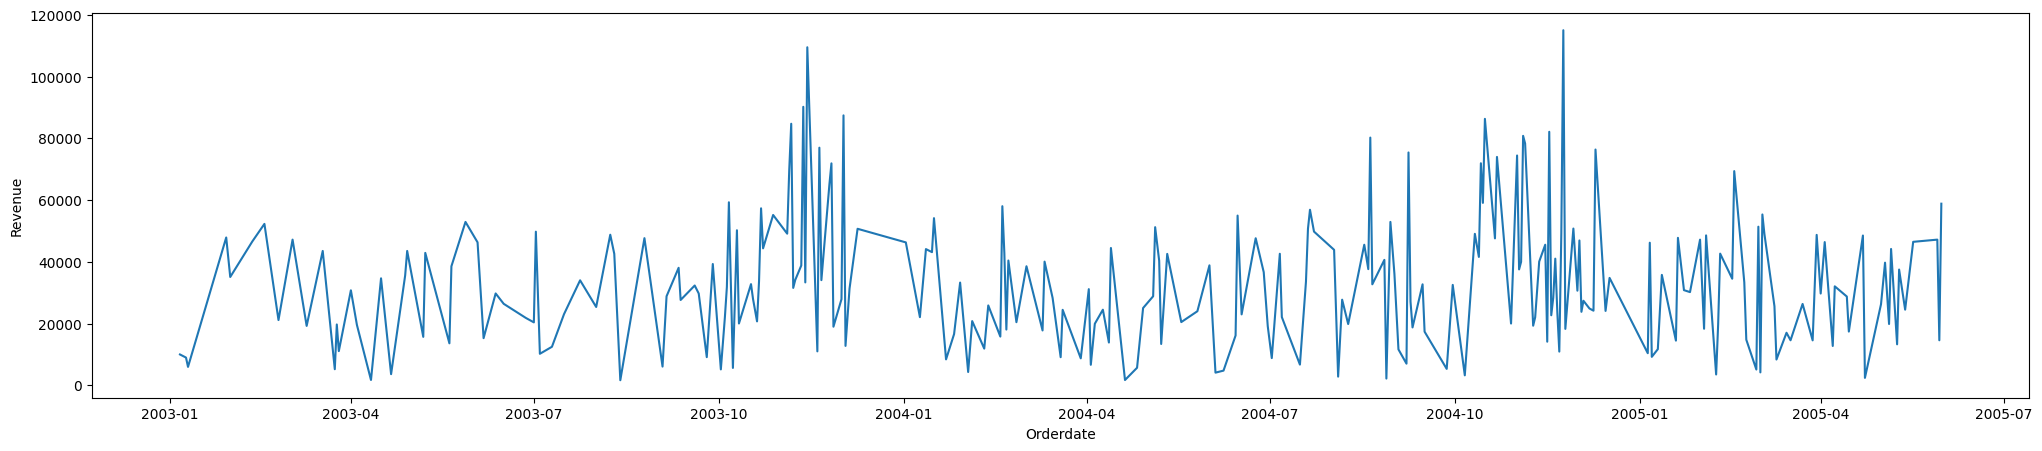

In [ ]:
plt.rcParams["figure.figsize"] = (25,5)

plt.plot('Orderdate', 'Revenue', data = agg_daily)
plt.xlabel('Orderdate')
plt.ylabel('Revenue')
plt.show()

From the plot, I think the data has a seasonal trend on November.

#Answer The Question

In [ ]:
agg_sales = data_df1.groupby('Productline')['Revenue'].agg(['min', 'max','sum'])
agg_sales

,min,max,sum
Productline,,,
Classic Cars,640.05,9048.16,2968546.40
Motorcycles,651.80,6600.00,971086.29
Planes,875.91,7543.75,877942.21
Ships,1089.36,5000.00,677940.40
Trains,972.40,5000.00,203804.26
Trucks and Buses,482.13,7000.00,947355.18
Vintage Cars,541.14,7600.00,1646013.29


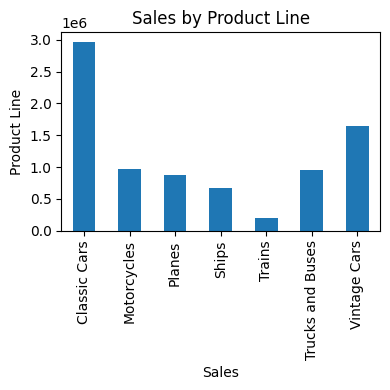

In [ ]:
plt.figure(figsize=(4, 4))
agg_sales['sum'].plot(kind='bar')
plt.title('Sales by Product Line')
plt.xlabel('Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

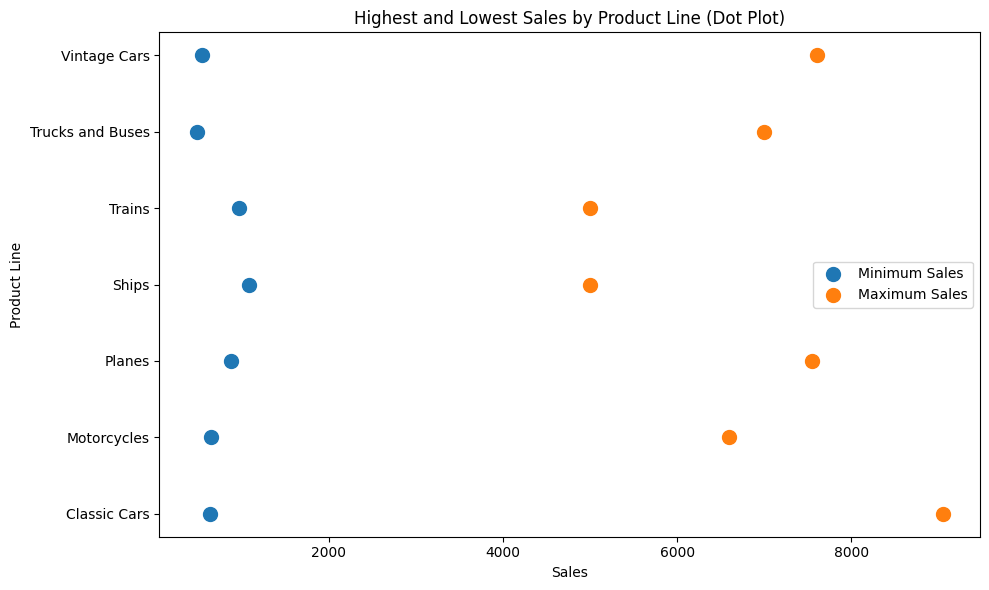

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(agg_sales['min'], agg_sales.index, label='Minimum Sales', marker='o', s=100)
plt.scatter(agg_sales['max'], agg_sales.index, label='Maximum Sales', marker='o', s=100)
plt.xlabel('Sales')
plt.ylabel('Product Line')
plt.title('Highest and Lowest Sales by Product Line')
plt.legend()
plt.tight_layout()
plt.show()

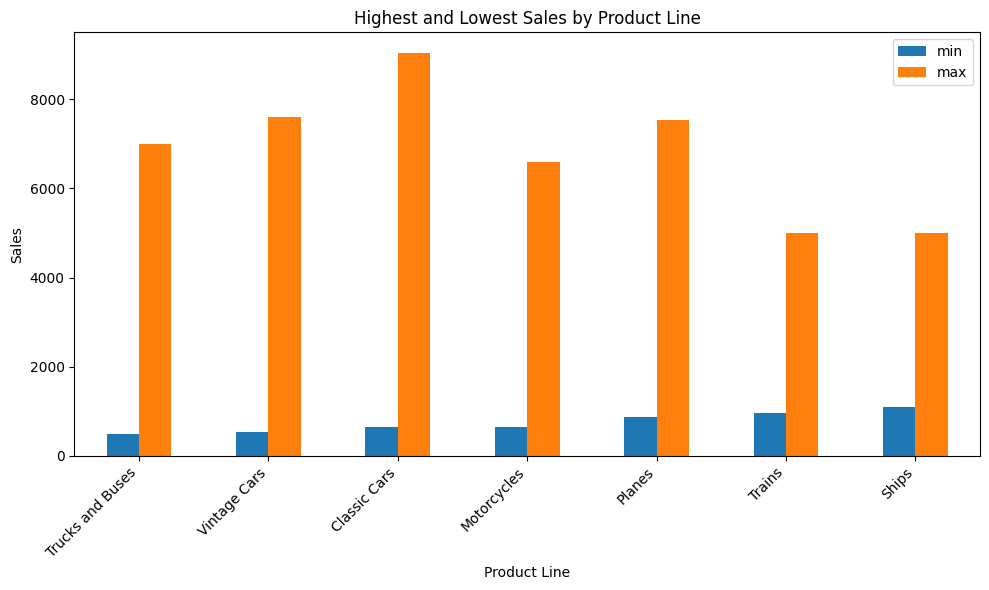

In [ ]:
agg_sales_sorted = agg_sales.sort_values('min')
agg_sales_sorted.plot(kind='bar', figsize=(10, 6))
plt.title('Highest and Lowest Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
data_df1['Dealsize']

0       Medium
1       Medium
2        Small
3        Small
4       Medium
         ...  
2819    Medium
2820     Small
2821    Medium
2822     Small
2823     Small
Name: Dealsize, Length: 2824, dtype: object

In [ ]:
cor = data_df1['Revenue'].corr(data_df1['DealsizeRank'])
print(cor)

0.7857173854555282


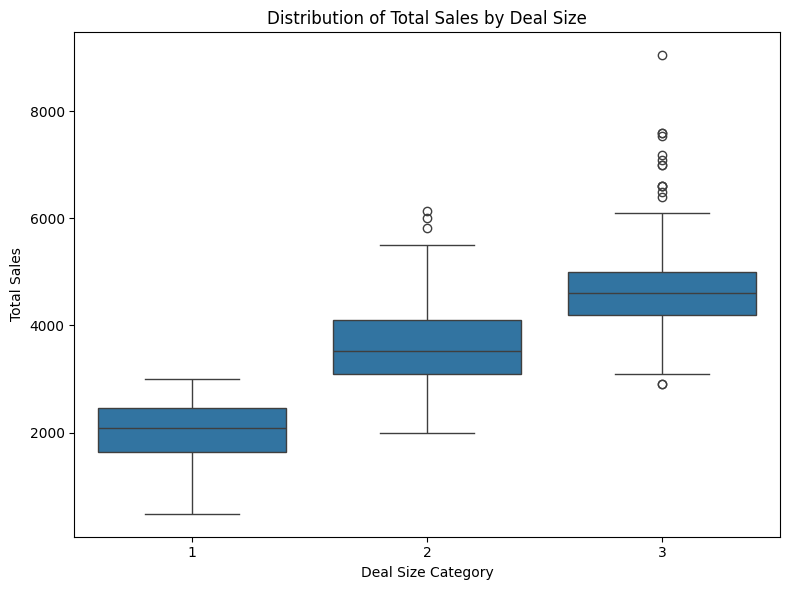

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DealsizeRank', y='Revenue', data=data_df1)
plt.title('Distribution of Total Sales by Deal Size')
plt.xlabel('Deal Size Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
agg_dealsize = data_df1.groupby('Dealsize')['Revenue'].sum()
agg_dealsize

Dealsize
Large      738757.91
Medium    4961736.68
Small     2592193.44
Name: Revenue, dtype: float64

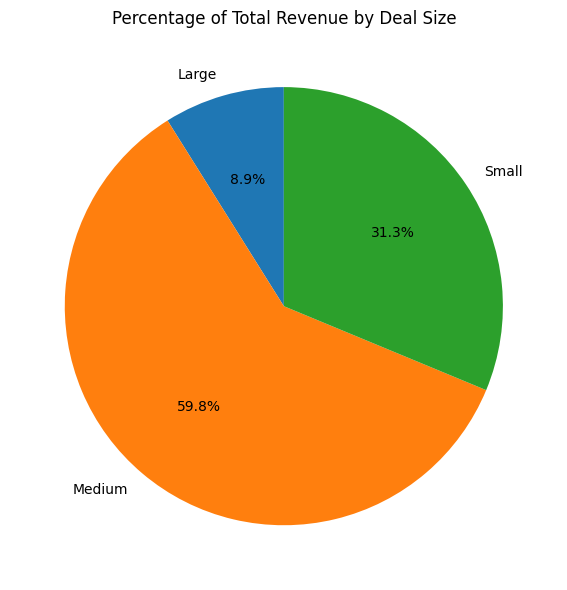

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(agg_dealsize, labels = agg_dealsize.index, autopct='%.1f%%', startangle=90)
plt.title('Percentage of Total Revenue by Deal Size')
plt.tight_layout()
plt.show()

#Conclusions

From the analysis that I've done, Here's the conclusions that I have:
1. From the sorted bar chart, we can conclude that Truck and Buses have the lowest sales (482.13) and for the highest is Classic Cars (9048.16).
But, if we see it overall, Train has the lowest sales (203804.26) and Classic Cars has the highest sales (2968546.40).
2. For the sales performance, The revenue always reach the peak every November. We can see that the plot have a max point on December 2003 and 2004.
3. From the correlation test, we know that deal size have a positive correlation with total sales (0.786). For the percentage of distribution, it shown on the pie chart. Medium size has the biggest contribution (59.8%) more than 50%. Followed by Small size then Large size.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
save_path = '/content/drive/MyDrive/Minicourse/data_df1.csv'  # Adjust the path as needed
data_df1.to_csv(save_path, index=False)